# Voronoi parameters

[Voronoi tessellation](http://pyscal.com/en/latest/methods/voronoiparameters/voronoiparameters.html) can be used to identify local structure by counting the number of faces of the Voronoi polyhedra of an atom. For each atom a vector $\langle n3~n4~n5~n6$ can be calculated where $n_3$ is the number of Voronoi faces of the associated Voronoi polyhedron with three vertices, $n_4$ is with four vertices and so on. Each perfect crystal structure such as a signature vector, for example, bcc can be identified by $\langle 0~6~0~8 \rangle$ and fcc can be identified using $\langle 0~12~0~0 \rangle$. It is also a useful tool for identifying icosahedral structure which has the fingerprint $\langle 0~0~12~0 \rangle$. 

In [1]:
from pyscal3 import System
import matplotlib.pyplot as plt
import numpy as np

For this example, fcc, bcc, hcp and diamond structures are created.

In [2]:
bcc = System.create.lattice.bcc(lattice_constant=4, repetitions=[4,4,4])
fcc = System.create.lattice.fcc(lattice_constant=4, repetitions=[4,4,4])
hcp = System.create.lattice.hcp(lattice_constant=4, repetitions=[4,4,4])

Before calculating the Voronoi polyhedron, the [neighbors for each atom](http://pyscal.com/en/latest/methods/nearestneighbormethods/nearestneighbormethods.html) need to be found using Voronoi method.

In [3]:
bcc.find.neighbors(method='voronoi')
fcc.find.neighbors(method='voronoi')
hcp.find.neighbors(method='voronoi')

Now, Voronoi vector can be calculated

In [4]:
fcc.calculate.voronoi_vector()
bcc.calculate.voronoi_vector()
hcp.calculate.voronoi_vector()

/home/menon/miniconda3/envs/pyscal-test/lib/python3.10/site-packages/pyscal3/operations/voronoi.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  system.atoms["edge_lengths"] = np.array(complete_edge_lengths)


We can access the values

In [5]:
fcc.atoms.voronoi.vector

array([[ 0, 12,  0,  0],
       [ 0, 12,  0,  0],
       [ 0, 12,  0,  0],
       ...,
       [ 0, 12,  0,  0],
       [ 0, 12,  0,  0],
       [ 0, 12,  0,  0]])

As expected, fcc structure exhibits 12 faces with four vertices each. For a single atom, the difference in the Voronoi fingerprint is shown below

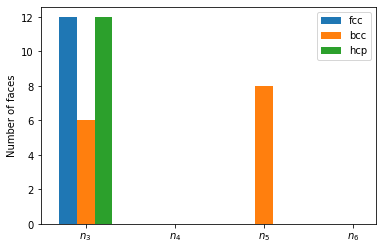

In [6]:
fig, ax = plt.subplots()
ax.bar(np.array(range(4))-0.2, fcc.atoms.voronoi.vector[10], width=0.2, label="fcc")
ax.bar(np.array(range(4)), bcc.atoms.voronoi.vector[10], width=0.2, label="bcc")
ax.bar(np.array(range(4))+0.2, hcp.atoms.voronoi.vector[10], width=0.2, label="hcp")
ax.set_xticks([1,2,3,4])
ax.set_xlim(0.5, 4.25)
ax.set_xticklabels(['$n_3$', '$n_4$', '$n_5$', '$n_6$'])
ax.set_ylabel("Number of faces")
ax.legend()

The difference in Voronoi fingerprint for bcc and the closed packed structures is clearly visible. Voronoi tessellation, however, is incapable of distinction between fcc and hcp structures.

## Voronoi volume

Voronoi volume, which is the volume of the Voronoi polyhedron is calculated when the neighbors are found. The volume can also be accessed.

In [7]:
np.mean(fcc.atoms.voronoi.volume)

16.0